(test-functions:gramacy-1d-sine)=
# Gramacy (2007) One-dimensional (1D) Sine Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The Gramacy (2007) one-dimensional (1D) sine function 
(or `Gramacy1DSine` function for short)
is a scalar-valued function that features two regimes: one part is a mixture
of sines and cosines, and another part is a linear function.
The function was introduced in {cite}`Gramacy2007` in the context of 
metamodeling with non-stationary Gaussian processes.

In the original paper, the response of the function is disturbed by an 
independent identically distributed (i.i.d) Gaussian noise.

A plot of the function is shown below for $x \in [0, 20]$.

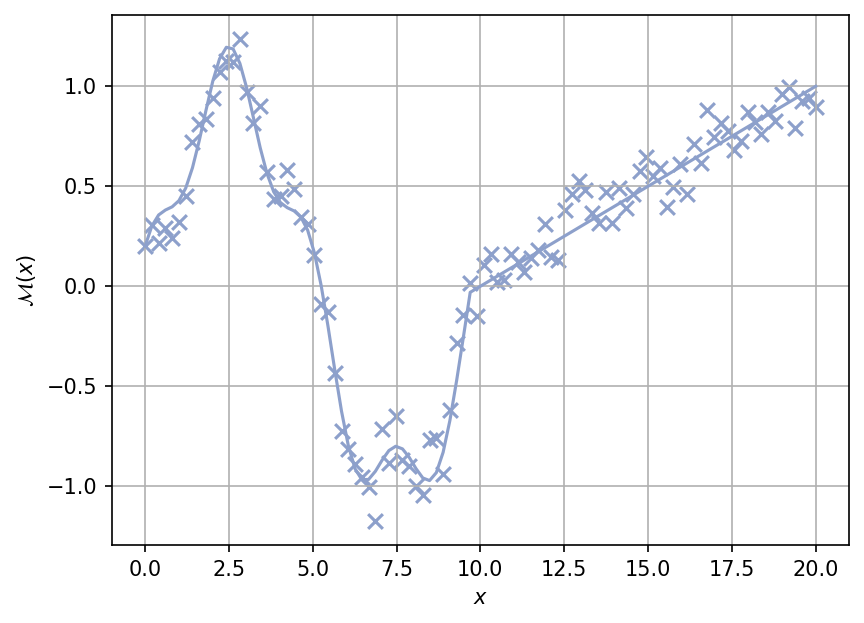

In [2]:
my_testfun_noisy = uqtf.Gramacy1DSine()
my_testfun_noiseless = uqtf.Gramacy1DSine(parameters_selection="noiseless")
rng = np.random.default_rng(3423)
my_testfun_noisy.parameters = rng


xx = np.linspace(0, 20, 100)[:, np.newaxis]
yy_noisy = my_testfun_noisy(xx)
yy_noiseless = my_testfun_noiseless(xx)

# --- Create the plot
plt.plot(xx, yy_noiseless, color="#8da0cb")
plt.scatter(xx, yy_noisy, color="#8da0cb", marker="x", s=50)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$\mathcal{M}(x)$")
plt.gcf().tight_layout(pad=3.0)
plt.gcf().set_dpi(150);

Note that the function is discontinuous at $x = 9.6%$ which also pinpoints
the change of regime.

## Test function instance

To create a default instance of the test function:

In [3]:
my_testfun = uqtf.Gramacy1DSine()

Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : Gramacy1DSine
Spatial dimension : 1
Description       : One-dimensional sine function from Gramacy (2007)


## Description

The test function is analytically defined as follows[^location]:

$$
\mathcal{M}(x) = \begin{cases}
\sin{(\frac{\pi x}{5})} + \frac{1}{5} \cos{(\frac{4 \pi x}{5})}, & x \leq 9.6 \\
\frac{1}{10} x - 1, & x > 9.6
\end{cases},
$$
where $x$ is defined below.

The response of the function is disturbed by an i.i.d Gaussian noise,
such that:

$$
y(x) = \mathcal{M}(x) + \varepsilon,
$$
where $\varepsilon \sim \mathcal{N}(0, \sigma_n = 0.1)$.

## Probabilistic input

Based on {cite}`Gramacy2007`, the domain of the function is $[0, 20]$.
This input can be modeled with a single uniform random variable shown below.

In [5]:
my_testfun.prob_input

ProbInput(spatial_dimension=1, marginals=(UnivDist(distribution='uniform', parameters=array([ 0., 20.]), name='x', description='None'),), copulas=None, name='Gramacy2007', description='Input model for the one-dimensional function from Gramacy (2007)')

## Parameters

The parameters of the test function is a NumPy random number generator with 
which the Gaussian random noise is generated.
Other available parameters are shown in the table below.

| No. |                      Value                      |      Keyword      |       Source        |
|:---:|:-----------------------------------------------:|:-----------------:|:-------------------:|
|  1  | $\varepsilon \sim \mathcal{N}(0, \sigma_n=0.1)$ | `noisy` (default) | {cite}`Gramacy2007` |
|  2  |                $\varepsilon = 0$                |    `noiseless`    |                     |

Alternatively, to create an instance of the `Gramacy1DSine` function with
different parameters, type

```python
my_testfun = uqtf.Gramacy1DSine(parameters_selection="noiseless")
```

````{note}
To use a custom random number generator (perhaps with a fixed seed number),
create a default test function and use the custom generator as the parameters
after the instance has been
created.
For example:
```python
my_testfun = uqtf.Gramacy1DSine()
my_rng = np.random.default_rng(322345)
my_testfun.parameters = my_rng
```
````

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^location]: see Section 4.2, p. 17, Eq. (16) in {cite}`Gramacy2007`;
also the actual implementation as an R code not far below that.